**Importing libraries**

In [784]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

In [785]:
# from google.colab import files
# uploaded1 = files.upload()
# uploaded2 = files.upload()

In [786]:
df_train=pd.read_excel('train.xlsx')
df_test=pd.read_excel('test.xlsx')

## Converting Excel sheet to csv

In [787]:
df_train.to_csv('train_flight_data.csv',index=None)
df_test.to_csv('test_flight_data.csv',index=None)

In [788]:
df_train=pd.read_csv('train_flight_data.csv')

In [789]:
df_test =pd.read_csv('test_flight_data.csv')

In [790]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [791]:
df_train.shape

(10683, 11)

In [792]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# **EDA**

In [793]:
airline_vc=df_train['Airline'].value_counts()
airline_vc

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

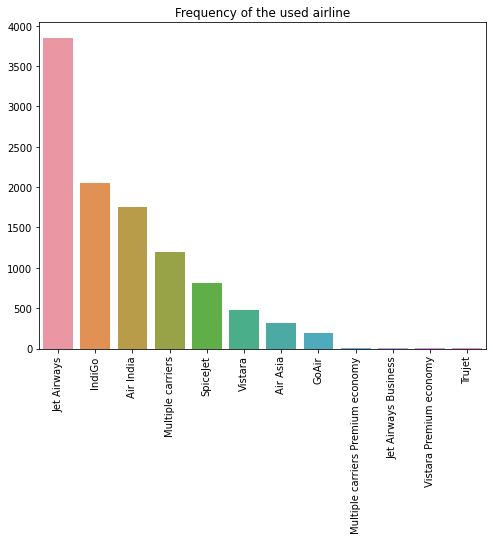

In [794]:

x_data=airline_vc.index
y_data=airline_vc.values
plt.figure(figsize=(8,6))
sn.barplot(x_data,y_data)
plt.title('Frequency of the used airline')
plt.xticks(rotation=90)

This show that jet airways is the most used airline of all



## **To Check which path has the highest fare and frequency**

In [795]:
df_fp = df_train[['Price','Route']]
df_fp['Source_des'] =df_train['Source']+'-'+df_train['Destination']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [796]:
df_fp.sort_values(by='Price',ascending=False).head(15)

,Price,Route,Source_des
2924,79512,BLR → BOM → DEL,Banglore-New Delhi
5372,62427,BLR → BOM → DEL,Banglore-New Delhi
10364,57209,BLR → MAA → DEL,Banglore-New Delhi
1478,54826,BLR → BOM → DEL,Banglore-New Delhi
5439,54826,BLR → BOM → DEL,Banglore-New Delhi
2618,54826,BLR → BOM → DEL,Banglore-New Delhi
9715,52285,DEL → ATQ → BOM → COK,Delhi-Cochin
657,52229,BLR → BOM → DEL,Banglore-New Delhi
7351,46490,DEL → ATQ → BOM → COK,Delhi-Cochin
396,36983,DEL → BOM → COK,Delhi-Cochin


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

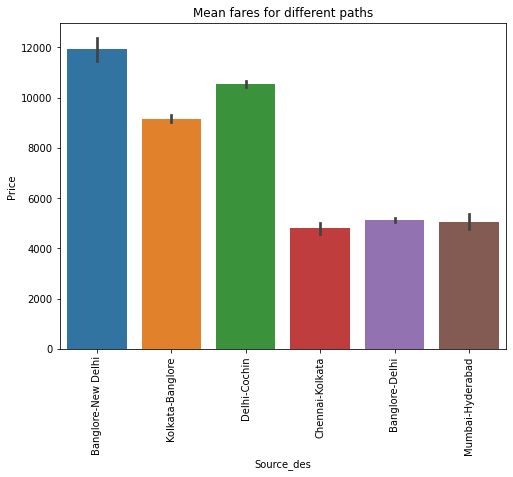

In [797]:
x_data=df_fp['Source_des']
y_data=df_fp['Price']
plt.figure(figsize=(8,6))
plt.title('Mean fares for different paths')
sn.barplot(x_data,y_data)
plt.xticks(rotation=90)

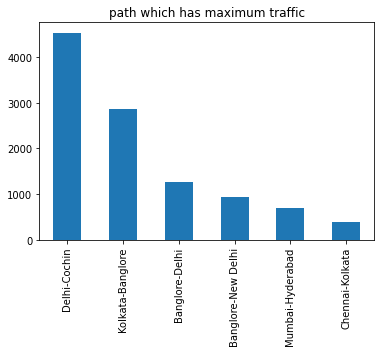

In [798]:
plt.title('path which has maximum traffic')
df_fp['Source_des'].value_counts().plot(kind='bar')
# plt.xlabel('Source-destination')
# plt.ylabel('Frequency of that path')
plt.show()

*This shows that Bangalore to delhi has the highest fare and the most frequent used path is Delhi to Cochin*

## 





In [799]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [800]:
df_train['Total_Stops'].replace(['1 stop','2 stops','3 stops','4 stops','non-stop'],[1,2,3,4,0],inplace=True)

In [801]:
def price_vs(df_obt,col_name):
  data=df_obt.groupby(col_name)['Price'].apply(np.mean)
  ax=sn.barplot(data.index,data.values)
  ax.set(xlabel=col_name,ylabel='Price')
  plt.title('Price vs '+col_name)
  plt.xticks(rotation=90)
  return data


Total_Stops
0.0     5024.900315
1.0    10594.123556
2.0    12715.807895
3.0    13112.000000
4.0    17686.000000
Name: Price, dtype: float64

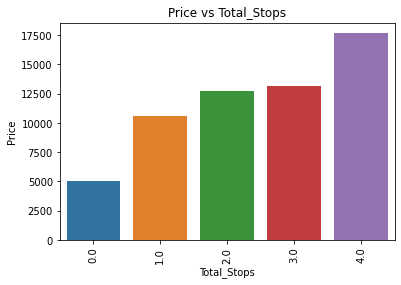

In [802]:
price_vs(df_train,'Total_Stops')

*How price varies with Time*

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

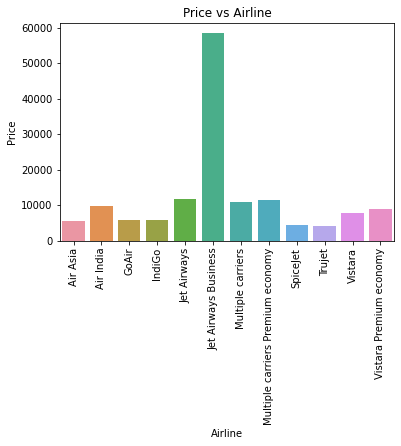

In [803]:

price_vs(df_train,"Airline")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

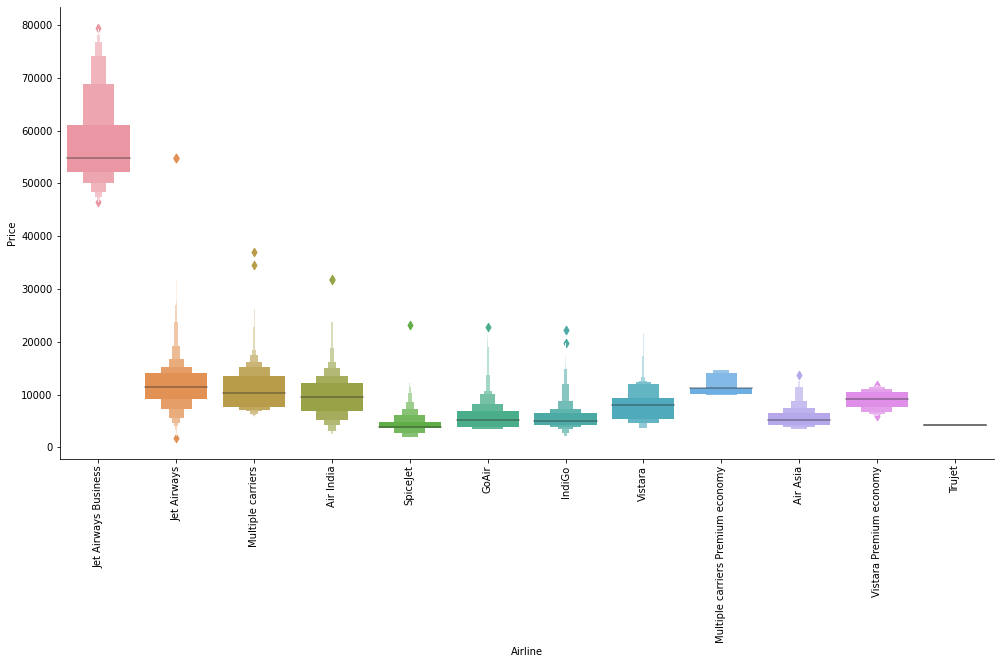

In [804]:


#Also using catplot to see which airline has the maximum fare
sn.catplot(x="Airline", y="Price",data=(df_train.sort_values(by='Price',ascending=False)),kind='boxen',height=7,aspect=2)
plt.xticks(rotation=90)

Converting Date of journey column to MOnth and Date column






In [805]:
df_train['Journey_day']=pd.to_datetime(df_train['Date_of_Journey']).dt.day
df_train['Journey_month']=pd.to_datetime(df_train['Date_of_Journey']).dt.month

In [806]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,3,1


In [807]:
#dropping all nan values
df_train=df_train.dropna()
# It has a wrong value of trip duration only 5 min which is not possible
df_train.drop([6474],inplace=True,axis=0)
df_train.reset_index(drop=True, inplace=True)

In [808]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
dtype: int64

Converting Duration column into Duration_hr and Duration_min

In [809]:
def time_hr():
  duration_hr=[]
  duration_min=[]
  data_1=df_train['Duration'].apply(lambda x:re.split('h',x))
  data_2=df_train['Duration'].apply(lambda x:re.split('m',x))
  for data in data_1:
    if (data[0]=='' or data[0]==' '):
      duration_hr.append(0)
    else:
      duration_hr.append(int(data[0]))
  for data in data_2:
    if (data[0][3:]=='' or data[0][3:]==' '):
      duration_min.append(0)
    else:
      duration_min.append(int(data[0][3:]))
  dic={'Duration_hr':duration_hr,'Duration_min':duration_min}
  return dic


In [810]:
data=pd.DataFrame(data=time_hr())
df_train=pd.concat([df_train,data],axis=1)

Changing departure time column to departure_hr and departure_min

In [811]:
df_train['Departure_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Departure_minute']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [812]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Duration_hr,Duration_min,Departure_hour,Departure_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3,2,50,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,5,1,7,25,5,50


## **Handling Categorical Features**

In [813]:
df_train['Additional_Info'].value_counts()
# most of the value is no info so we can drop this column

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [814]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [815]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [816]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [817]:
df_train=pd.get_dummies(df_train,columns=['Airline','Source','Destination'],drop_first=True)

In [818]:
df_train.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Duration_hr,Duration_min,Departure_hour,Departure_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3,2,50,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,5,1,7,25,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [819]:
# Now we can del the unnecessary columns

In [820]:
df_train.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [821]:
df_train.head(3)

,Total_Stops,Price,Journey_day,Journey_month,Duration_hr,Duration_min,Departure_hour,Departure_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2,50,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,7,25,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,19,0,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


***Scaling the numerical values using standarscaler***

In [822]:
X=df_train.drop(columns=['Price'],axis=1)
y=df_train['Price']

In [823]:
X.head(4)

,Total_Stops,Journey_day,Journey_month,Duration_hr,Duration_min,Departure_hour,Departure_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2,50,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,5,1,7,25,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,6,9,19,0,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,5,12,5,25,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [824]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

## **Splitting of data Test,Train and training model**

In [825]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=20)

In [826]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [827]:
predictions=model.predict(X_test).round()

In [828]:
predictions

array([ 4825.,  4108.,  7083., ...,  3921., 12193.,  5277.])

In [829]:
model.score(X_train,Y_train)

0.9545088974142728

In [830]:
model.score(X_test,Y_test,)

0.7825081834868362

In [831]:
#MSE (squred=true returns mse)
print(mean_squared_error(Y_test,predictions,squared=True))
#RMSE (squared=false returns rmse)
print(mean_squared_error(Y_test,predictions,squared=False))


4250903.1137108095
2061.771838422188


## **Hypertuning the parameters**

In [832]:
parameters={
    'ccp_alpha':[0,1,3],
    'bootstrap':[True, False],
    'max_depth':[10, 20, 30, 40, 50],
    'max_features':['auto', 'sqrt'],
    'min_samples_leaf':[1, 2, 4],
    'min_samples_split':[2, 5, 10],
    'n_estimators':[200, 400, 600, 800, 1000]
}

In [833]:
# rf_randomcv=RandomizedSearchCV(model,param_distributions=parameters,n_iter=50,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)

In [834]:
# rf_randomcv.fit(X_train,Y_train)

In [835]:
rf_randomcv.best_params_

{'bootstrap': True,
 'ccp_alpha': 3,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1600}

## **Final Model with hypertuned parameters**

In [836]:
model_new=RandomForestRegressor(bootstrap=True,ccp_alpha=3,max_depth=50,max_features='auto',min_samples_leaf=1,min_samples_split=10,
 n_estimators=1600)
model_new.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=3, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [837]:
predictions_new=model.predict(X_test)

In [838]:
#MSE (squred=true returns mse)
print(mean_squared_error(Y_test,predictions_new,squared=True))
#RMSE (squared=false returns rmse)
print(mean_squared_error(Y_test,predictions_new,squared=False))

4250905.953394466
2061.7725270733595


In [839]:
# R^2 cofficient (1=best)
model_new.score(X_test,Y_test)


0.8079185115013703

In [845]:
model_new.score(X_train,Y_train)

0.9103653563564009

## **Dumping the model into a pickel file**

In [842]:
# #Saving the trained model so that it can be used next time 
# to load the model use [model = load('filename.joblib')] 
dump(model_new, 'flight_fare_predictor_model.joblib')

['flight_fare_predictor_model.joblib']